### let's look at some of the (hopefully) pretty molecules we generate!

In [2]:
from rdkit import Chem
import pickle

from ipywidgets import interact, fixed, IntSlider
import ipywidgets
import py3Dmol

def show_mol(mol, view, grid):
    mb = Chem.MolToMolBlock(mol)
    view.removeAllModels(viewer=grid)
    view.addModel(mb,'sdf', viewer=grid)
    view.setStyle({'model':0},{'stick': {}}, viewer=grid)
    view.zoomTo(viewer=grid)
    return view

def view_single(mol):
    view = py3Dmol.view(width=600, height=600, linked=False, viewergrid=(1,1))
    show_mol(mol, view, grid=(0, 0))
    return view

def MolTo3DView(mol, size=(600, 600), style="stick", surface=False, opacity=0.5, confId=0):
    """Draw molecule in 3D
    
    Args:
    ----
        mol: rdMol, molecule to show
        size: tuple(int, int), canvas size
        style: str, type of drawing molecule
               style can be 'line', 'stick', 'sphere', 'carton'
        surface, bool, display SAS
        opacity, float, opacity of surface, range 0.0-1.0
    Return:
    ----
        viewer: py3Dmol.view, a class for constructing embedded 3Dmol.js views in ipython notebooks.
    """
    assert style in ('line', 'stick', 'sphere', 'carton')
    mblock = Chem.MolToMolBlock(mol[confId])
    viewer = py3Dmol.view(width=size[0], height=size[1])
    viewer.addModel(mblock, 'mol')
    viewer.setStyle({style:{}})
    if surface:
        viewer.addSurface(py3Dmol.SAS, {'opacity': opacity})
    viewer.zoomTo()
    return viewer

def conf_viewer(idx, mol):
    return MolTo3DView(mol, confId=idx).show()

In [11]:
# with open('trained_models/qm9/test_mols.pkl', 'rb') as f:
# with open('/pubhome/qcxia02/git-repo/AI-CONF/GeoMol/scripts/test_GeoMol_qm9_demo.pickle', 'rb') as f:
with open('/pubhome/qcxia02/git-repo/AI-CONF/GeoMol/scripts/test_GeoMol_drugs_pre.pickle', 'rb') as f:
# with open('/pubhome/qcxia02/git-repo/AI-CONF/GeoMol/scripts/test_GeoMol_qm9_pre.pickle', 'rb') as f:
    test_mols = pickle.load(f)

# test_mols
# smi='C1CCCCC1'
# smi='CCCC'
smi="CC(C)=O"
# """
# smi='c1ccccc1'
# smi='COC(=O)C(C(C)C)C(O)c1ccccc1'

mols = test_mols[smi]
interact(conf_viewer, idx=ipywidgets.IntSlider(min=0, max=len(mols)-1, step=1), mol=fixed(mols));
# """
# test_mols

interactive(children=(IntSlider(value=0, description='idx', max=9), Output()), _dom_classes=('widget-interact'…

C1CCCCC1


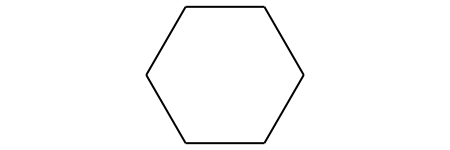

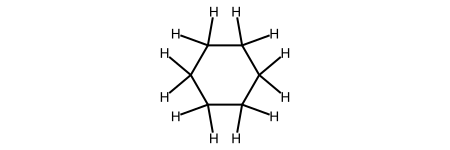

In [118]:
test_idx = 0

# smi = smiles[test_idx]
smi='C1CCCCC1'
print(smi)

mol_graph = Chem.MolFromSmiles(smi)
display(mol_graph)

Chem.AddHs(mol_graph)
# mols = test_mols[smi]
interact(conf_viewer, idx=ipywidgets.IntSlider(min=0, max=len(mols)-1, step=1), mol=fixed(mols));

In [1]:
import pickle
geo_pkl = "/pubhome/qcxia02/git-repo/AI-CONF/datasets/GeoMol/test/drugs-split0/12-11-15-37/test_GeoMol.pickle"
ref_pkl = "/pubhome/qcxia02/git-repo/AI-CONF/datasets/GeoMol/test/drugs-split0/12-11-15-37/test_ref.pickle"
rdk_pkl = "/pubhome/qcxia02/git-repo/AI-CONF/datasets/GeoMol/test/drugs-split0/12-11-15-37/test_rdkit.pickle"
# ref_pkl = "/pubhome/qcxia02/git-repo/AI-CONF/datasets/GeoMol/test/drugs-plati/test_ref.pickle"
with open (geo_pkl, 'rb') as fb:
    geo_data = pickle.load(fb)
with open (ref_pkl, 'rb') as fb:
    ref_data = pickle.load(fb)
with open (rdk_pkl, 'rb') as fb:
    rdk_data = pickle.load(fb)

In [121]:
ref_data[list(ref_data.keys())[0]]
list(ref_data.keys())

smi = 'Cn1c(=O)c2c(n3cnnc13)-c1ccccc1CC21CCCC1' #1
smi

'Cn1c(=O)c2c(n3cnnc13)-c1ccccc1CC21CCCC1'

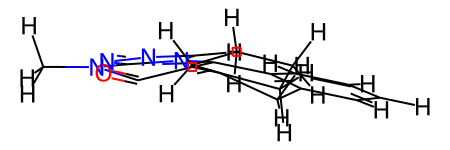

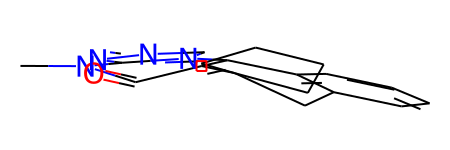

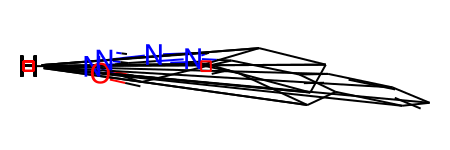

In [122]:
from rdkit.Chem.rdmolops import RemoveHs # We do not remove Hs to show add-hydgeon capability
display(geo_data[smi][0])
display(RemoveHs(geo_data[smi][0]))
display(Chem.AddHs(RemoveHs(geo_data[smi][0])))


# display(ref_data[smi][0])


In [ ]:
# interact(conf_viewer, idx=ipywidgets.IntSlider(min=0, max=len(geo_data[smi])-1, step=1), mol=fixed(geo_data[smi]));
# RemovH version
interact(conf_viewer, idx=ipywidgets.IntSlider(min=0, max=len(geo_data[smi])-1, step=1), mol=fixed(list(map(RemoveHs, geo_data[smi]))));




In [ ]:
interact(conf_viewer, idx=ipywidgets.IntSlider(min=0, max=len(ref_data[smi])-1, step=1), mol=fixed(ref_data[smi]));


In [47]:
a0 = ref_data[smi][0].GetConformer().GetPositions()
a1 = ref_data[smi][1].GetConformer().GetPositions()

print(a0)
print(a1)

[[ 2.90639043e+00 -2.66942525e+00  4.06152487e-01]
 [ 2.08652210e+00 -1.69829977e+00  2.40166053e-01]
 [ 2.64188528e+00 -4.67423737e-01  2.00256109e-02]
 [ 1.78182387e+00  6.10233366e-01 -1.64474338e-01]
 [ 4.30635601e-01  3.36614668e-01 -1.08024135e-01]
 [-4.70119923e-01  1.33858895e+00 -2.78947324e-01]
 [-1.84679151e+00  1.09728622e+00 -2.28032336e-01]
 [-2.32275605e+00 -1.74774081e-01 -1.12365501e-03]
 [-1.44064295e+00 -1.20571303e+00  1.75014198e-01]
 [-8.04558322e-02 -9.42956328e-01  1.20421953e-01]
 [ 7.96545148e-01 -1.91233826e+00  2.85749227e-01]
 [-1.80244982e+00 -2.19806981e+00  3.51971179e-01]
 [-3.70350671e+00 -3.33916277e-01  3.53501588e-02]
 [-4.22725773e+00 -2.45242000e-01  8.99099112e-01]
 [-2.49945021e+00  1.95719182e+00 -3.75465423e-01]
 [-1.15149103e-01  2.34389973e+00 -4.58127081e-01]
 [ 2.33488917e+00  1.83827949e+00 -3.84105265e-01]
 [ 1.79440987e+00  2.65179396e+00 -5.24043381e-01]
 [ 3.73547840e+00 -3.25729460e-01 -1.16070779e-02]]
[[-3.25546789 -2.34528899 -0.3

In [187]:
import numpy as np
import pickle
from rdkit.ML.Descriptors import MoleculeDescriptors
import pandas as pd
from pathlib import Path

calculator = MoleculeDescriptors.MolecularDescriptorCalculator(['NumRotatableBonds'])

dirty_rdk_smis = Path("/pubhome/qcxia02/git-repo/AI-CONF/datasets/GeoMol/test/drugs-plati/train_5epoch/rdkit_err_smiles_25.txt")
dirty_smi_list = dirty_rdk_smis.read_text().split("\n")

with open("/pubhome/qcxia02/git-repo/AI-CONF/datasets/GeoMol/test/drugs-plati/train_5epoch/test_ref.pickle", 'rb') as f:
    refdata = pickle.load(f)
smis = list(refdata.keys())
# numrots = [ calculator.CalcDescriptors(mol[0])[0] for _, mol in refdata.items() ]
numrots = [ calculator.CalcDescriptors(mol)[0] for smi, mol in refdata.items() if smi not in dirty_smi_list]
# print(numrots)
indexes = [smis.index(smi)+1 for smi in smis if smi not in dirty_smi_list]

covfile = "/pubhome/qcxia02/git-repo/AI-CONF/datasets/GeoMol/test/drugs-plati/train_5epoch/test_GeoMol_50-COV_R-th0.5-woh.npy"
matfile = "/pubhome/qcxia02/git-repo/AI-CONF/datasets/GeoMol/test/drugs-plati/train_5epoch/test_GeoMol_50-MAT_R-th0.5-woh.npy"
covs_GeoMol = list(np.load(covfile))
mats_GeoMol = list(np.load(matfile))

covfile = "/pubhome/qcxia02/git-repo/AI-CONF/datasets/GeoMol/test/drugs-plati/train_5epoch/test_rdkit_50-COV_R-th0.5-woh.npy"
matfile = "/pubhome/qcxia02/git-repo/AI-CONF/datasets/GeoMol/test/drugs-plati/train_5epoch/test_rdkit_50-MAT_R-th0.5-woh.npy"
covs_rdkit = list(np.load(covfile))
mats_rdkit = list(np.load(matfile))
num_cov_mat_dict = {
    'No.': indexes,
    'num_rotatable': numrots,
    'cov_GeoMol': covs_GeoMol,
    'mat_GeoMol': mats_GeoMol,
    'cov_rdkit': covs_rdkit,
    'mat_rdkit': mats_rdkit
}

# covs_GeoMol
print(len(covs_GeoMol))
print(len(mats_GeoMol))
print(len(covs_rdkit))
print(len(mats_rdkit))
df = pd.DataFrame(num_cov_mat_dict)

# outfile = "/pubhome/qcxia02/git-repo/AI-CONF/datasets/GeoMol/test/drugs-plati/test_result.csv"
# df.to_csv(outfile, index=False)
# print(np.where(covs==1.))
# print(len(np.where(covs==1.)[0]))

FileNotFoundError: [Errno 2] No such file or directory: '/pubhome/qcxia02/git-repo/AI-CONF/datasets/GeoMol/test/drugs-plati/train_5epoch/test_GeoMol_50-COV_R-th0.5-woh.npy'

1          2
4          5
21        23
34        39
35        40
        ... 
2443    2827
2445    2829
2447    2831
2464    2850
2471    2859
Name: No., Length: 382, dtype: int64
4          5
18        20
19        21
21        23
32        37
        ... 
2445    2829
2446    2830
2456    2841
2459    2844
2464    2850
Name: No., Length: 530, dtype: int64


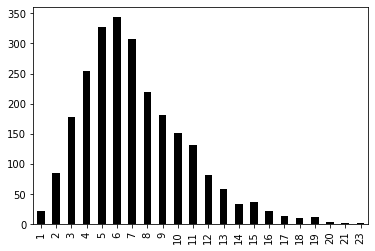

In [161]:
from matplotlib import pyplot as plt
from collections import Counter
import seaborn as sns

recounted = Counter(df['num_rotatable'].values) # This df is already filtered by error smiles
dict_want = {}
for key, value in list(dict(sorted(recounted.items())).items()):
    dict_want[str(key)] = value

series = pd.Series(dict_want)
series.plot.bar(color='black')
# a

# """
df_geo_cov1 = df[df['cov_GeoMol'] == 1.0]
df_rdk_cov1 = df[df['cov_rdkit'] == 1.0]

print(df_geo_cov1['No.'])
print(df_rdk_cov1['No.'])

# recounted = Counter(df_rdk_cov1['num_rotatable'].values)
# dict_want = {}
# for key, value in list(dict(sorted(recounted.items())).items()):
#     # print(key)
#     # print(value)
#     dict_want[str(key)] = value 
# series = pd.Series(dict_want)
# series.plot.bar(color='blue')

# recounted = Counter(df_geo_cov1['num_rotatable'].values)
# dict_want = {}
# for key, value in list(dict(sorted(recounted.items())).items()):
#     # print(key)
#     # print(value)
#     dict_want[str(key)] = value 
# series = pd.Series(dict_want)
# series.plot.bar(color='red')
# sns.distplot(df['num_rotatable'].values, bins=10)
# sns.histplot(df_cov1['num_rotatable'],bins=10, edgecolor="black")
# """


In [166]:
print(smis[1])
print(smis[2858])
print(smis[2829])
print(smis[2840])
print(smis[2843])



O=[N+]([O-])c1cc(C(F)(F)F)ccc1NCc1ccco1
Nc1nc2c(c(=O)[nH]1)NC(C=O)CN2
O=P([O-])([O-])C(O)(Cn1ccnc1)P(=O)([O-])[O-]
CC1[NH2+]C(C[NH3+])C(O)C(O)C1O
CC(C)C1[NH2+]CC(O)C(O)C1O


In [ ]:
# plt.hist(x=df_cov1['num_rotatable'],bins=10, edgecolor="black")


In [132]:
import numpy as np

datapath = "/pubhome/qcxia02/git-repo/AI-CONF/datasets/GeoMol/test/drugs-split0/12-11-15-37/test_GeoMol-ingroup-rmsd-woh.npy"
geodata = np.load(datapath)
datapath = "/pubhome/qcxia02/git-repo/AI-CONF/datasets/GeoMol/test/drugs-split0/12-11-15-37/test_rdkit-ingroup-rmsd-woh.npy"
rdkdata = np.load(datapath)
print(geodata.mean())
print(rdkdata.mean())
print(np.median(geodata))
print(np.median(rdkdata))

1.5602643401468888
1.3888250689897954
1.5774150382396521
1.4294499892508712
